In [252]:
from numpy import *
#value of leaf node
def regLeaf(dataset):
    return mean(dataset[:,-1])
#find the error
def regErr(dataset):
    return var(dataset[:,-1])*dataset.shape[0]
#split the dataset for left and right
def splitDataset(dataset,feature,value):
    mat0 = dataset[dataset[:,feature] < value,:]
    mat1 = dataset[dataset[:,feature] >= value,:]
    return mat0, mat1
#create a tree recursively
#i have used a dictionary bt you can follow oop concepts to create this
def create_tree(dataset, leafType = regLeaf ,errType = regErr , ops=(1,4)):
    #ops = pre pruning parameters as they show better results than post pruning
    feature , value = ChooseBestSplit(dataset,regLeaf,regErr,ops)
    if feature == None:
        return value
    tree = {}
    tree['feat'] = feature
    tree['value'] = value
    lset , rset = splitDataset(dataset,feature,value)
    tree['left'] = create_tree(lset,leafType,errType,ops)
    tree['right'] = create_tree(rset,leafType,errType,ops)
    return tree

#finding the best split
def ChooseBestSplit(dataset,leafType,errType,ops):
    #error limit
    tolE = ops[0]
    #min no of points on one side
    tolN = ops[1]
    if len(set(dataset[:,-1])) == 1:
        return None, leafType(dataset)
    m,n = dataset.shape
    S = errType(dataset)
    bestS = inf
    bestIndex = 0 
    bestValue = 0
    for featindex in range(n-1):
        for splitValue in range(m-1):
            mat0 , mat1 = splitDataset(dataset,featindex,splitValue)
            if mat0.shape[0]< tolN or mat1.shape[0]< tolN:
                continue
            newS = errType(mat0) + errType(mat1)
            if newS < bestS:
                bestIndex = featindex
                bestValue = splitValue
                bestS = newS
    if S - bestS < tolE:
        return None,leafType(dataset)
    mat0, mat1 = splitDataset(dataset,bestIndex,bestValue)
    if mat0.shape[0]< tolN or mat1.shape[0]< tolN:
        return None,LeafType(dataset)
    return bestIndex,bestValue
    
                

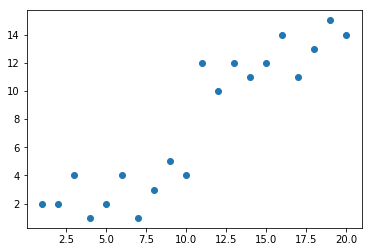

In [253]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(mattrain[:,0],mattrain[:,1])

In [254]:
x = create_tree(mattrain)

In [255]:
x

{'feat': 0,
 'value': 11,
 'left': {'feat': 0, 'value': 6, 'left': 2.2, 'right': 3.4},
 'right': 12.4}

In [256]:
def isTree(obj):
     return (type(obj).__name__=='dict')
def getMean(tree):
    if isTree(tree['right']):
            tree['right'] = getMean(tree['right'])
    if isTree(tree['left']):
        tree['left'] = getMean(tree['left'])
        return (tree['left']+tree['right'])/2.0
#post pruning function
def prune(tree, testData):
    if shape(testData)[0] == 0: 
        return getMean(tree)
    if (isTree(tree['right']) or isTree(tree['left'])):
         lSet, rSet = binSplitDataSet(testData, tree['feat'],tree['value'])
    if isTree(tree['left']):
        tree['left'] = prune(tree['left'], lSet)
    if isTree(tree['right']): 
        tree['right'] = prune(tree['right'], rSet)
    if not isTree(tree['left']) and not isTree(tree['right']):
        lSet, rSet = binSplitDataSet(testData, tree['feat'],tree['value'])
        errorNoMerge = sum(power(lSet[:,-1] - tree['left'],2)) +sum(power(rSet[:,-1] - tree['right'],2))
        treeMean = (tree['left']+tree['right'])/2.0
        errorMerge = sum(power(testData[:,-1] - treeMean,2))
        if errorMerge < errorNoMerge:
            print("merging")
            return treeMean
        else: return tree
    else: return tree

In [257]:
# FOR FUTURE PURPOSES
# def linearSolve(dataSet):
#     m,n = shape(dataSet)
#     X = mat(ones((m,n))); Y = mat(ones((m,1)))
#     X[:,1:n] = dataSet[:,0:n-1]; Y = dataSet[:,-1]
#     xTx = X.T*X
#     if linalg.det(xTx) == 0.0:
#         raise NameError('This matrix is singular, cannot do inverse,try increasing the second value of ops')
#     ws = xTx.I * (X.T * Y)
#     return ws,X,Y
# def modelLeaf(dataSet):
#     ws,X,Y = linearSolve(dataSet)
#     return ws
# def modelErr(dataSet):
#     ws,X,Y = linearSolve(dataSet)
#     yHat = X * ws
#     return sum(power(Y - yHat, 2))

In [273]:

def regTreeEval(model, inDat):
    return float(model)
# def modelTreeEval(model, inDat):
#     n = shape(inDat)[1]
#     X = mat(ones((1,n+1)))
#     X[:,1:n+1]=inDat
#     return float(X*model)
def treeForeCast(tree, inData, modelEval=regTreeEval):
    if not isTree(tree): return modelEval(tree, inData)
    if inData[tree['feat']] < tree['value']:
        if isTree(tree['left']):
            return treeForeCast(tree['left'], inData , modelEval)
        else:
            print(inData[tree['feat']], tree['value'])
            print(tree['left'],"left")
            return modelEval(tree['left'], inData)
    else:
        if isTree(tree['right']):
            return treeForeCast(tree['right'], inData , modelEval)
        else:
            print(inData[tree['feat']], tree['value'])
            print(tree['right'],"right")
            return modelEval(tree['right'], inData)
#PREDICTING THE OUTPUT
def createForeCast(tree, testData, modelEval=regTreeEval):
   
    m=len(testData)
    yHat = testData
    yHat = yHat.astype(float)
    print(yHat)
    for i in range(m):
        
        yHat[i] = treeForeCast(tree, mat(testData[i]),modelEval)
        
    return yHat

In [274]:
x_train = [[1,2],[2,2],[3,4],[4,1],[5,2],[6,4],[7,1],[8,3],[9,5],[10,4],
    [11,12],[12,10],[13,12],[14,11],[15,12],[16,14],[17,11],[18,13],[19,15],[20,14]]
x_test = [[2,2],[3,4],[4,1],[6,4],[8,3],[10,4],
    [11,12],[13,12],[15,12],[17,11],[18,13],[20,14]]
mattrain = array(x_train)
mattest = array(x_test)
yHat = createForeCast(x, mattrain[:,0])
print(flip(yHat))
print(corrcoef(yHat, mattrain[:,1],rowvar=0)[0,1])

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]
[[1]] 6
2.2 left
[[2]] 6
2.2 left
[[3]] 6
2.2 left
[[4]] 6
2.2 left
[[5]] 6
2.2 left
[[6]] 6
3.4 right
[[7]] 6
3.4 right
[[8]] 6
3.4 right
[[9]] 6
3.4 right
[[10]] 6
3.4 right
[[11]] 11
12.4 right
[[12]] 11
12.4 right
[[13]] 11
12.4 right
[[14]] 11
12.4 right
[[15]] 11
12.4 right
[[16]] 11
12.4 right
[[17]] 11
12.4 right
[[18]] 11
12.4 right
[[19]] 11
12.4 right
[[20]] 11
12.4 right
[12.4 12.4 12.4 12.4 12.4 12.4 12.4 12.4 12.4 12.4  3.4  3.4  3.4  3.4
  3.4  2.2  2.2  2.2  2.2  2.2]
0.9629726340502686


In [215]:
n = mat(((12,1),(12,2)))

In [218]:
n[0,0]

12

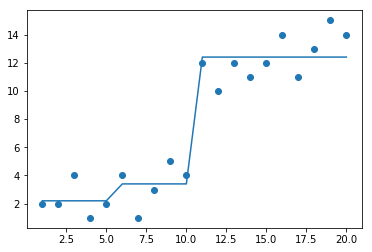

In [275]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(mattrain[:,0],mattrain[:,1])
plt.plot(mattrain[:,0],yHat)